<a href="https://colab.research.google.com/github/orin00/colab/blob/main/0321_%EC%98%A4%EC%84%B1%EC%B0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pass/Fail에 대한 모델링

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.shape

(1567, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        1567 non-null   float64
 1   X86        1567 non-null   float64
 2   X87        1567 non-null   float64
 3   X88        1567 non-null   float64
 4   X113       1567 non-null   float64
 5   X115       1567 non-null   float64
 6   X116       1567 non-null   float64
 7   X117       1567 non-null   float64
 8   X119       1186 non-null   float64
 9   X120       1567 non-null   float64
 10  X156       1567 non-null   float64
 11  X221       1567 non-null   float64
 12  X222       1567 non-null   float64
 13  X223       1567 non-null   float64
 14  X248       1567 non-null   float64
 15  X250       1567 non-null   float64
 16  X251       1567 non-null   float64
 17  X252       1567 non-null   float64
 18  X254       1567 non-null   float64
 19  X255       1567 non-null   float64
 20  X291    

In [5]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1186.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.405054,2.401872,0.982420,1807.815021,0.945424,747.383792,0.987130,58.625908,0.970696,6.310863,...,6.395717,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.066369
std,0.016737,0.037332,0.012848,53.537262,0.012133,48.949250,0.009497,6.485174,0.008740,0.124304,...,1.888698,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.249005
min,1.179700,2.242500,0.774900,1627.471400,0.853400,544.025400,0.890000,52.806800,0.841100,5.125900,...,2.170000,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,0.000000
25%,1.396500,2.376850,0.975800,1777.470300,0.938600,721.023000,0.989500,57.978300,0.964800,6.246400,...,4.895450,530.702700,1.982900,7.500000,0.242250,2.567850,0.075100,1.408450,11.501550,0.000000
50%,1.406000,2.403900,0.987400,1809.249200,0.946400,750.861400,0.990500,58.549100,0.969450,6.313600,...,6.410800,532.398200,2.118600,8.650000,0.293400,2.975800,0.089500,1.624500,13.817900,0.000000
75%,1.415000,2.428600,0.989700,1841.873000,0.952300,776.781850,0.990900,59.133900,0.978175,6.375850,...,7.594250,534.356400,2.290650,10.130000,0.366900,3.492500,0.112150,1.902000,17.080900,0.000000
max,1.453400,2.555500,0.993500,2105.182300,0.976300,924.531800,0.992400,311.734400,0.982700,7.522000,...,14.447900,589.508200,2.739500,454.560000,2.196700,170.020400,0.550200,90.423500,96.960100,1.000000


In [6]:
df.head()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


결측치 처리 : 결측치가 있는 X119 의 값들이 편차가 얼마 안되서 평균으로 대체했습니다.

In [7]:
df.isnull().sum()

X20            0
X86            0
X87            0
X88            0
X113           0
X115           0
X116           0
X117           0
X119         381
X120           0
X156           0
X221           0
X222           0
X223           0
X248           0
X250           0
X251           0
X252           0
X254           0
X255           0
X291           0
X359           0
X360           0
X361           0
X386           0
X388           0
X389           0
X390           0
X392           0
X393           0
X429           0
X493           0
X494           0
X495           0
X520           0
X522           0
X523           0
X524           0
X526           0
X527           0
X570           0
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
Pass.Fail      0
dtype: int64

In [8]:
round(df['X119'].mean(),4)

0.9707

In [9]:
df = df.fillna(round(df['X119'].mean(),4))

In [10]:
df.isnull().sum()

X20          0
X86          0
X87          0
X88          0
X113         0
X115         0
X116         0
X117         0
X119         0
X120         0
X156         0
X221         0
X222         0
X223         0
X248         0
X250         0
X251         0
X252         0
X254         0
X255         0
X291         0
X359         0
X360         0
X361         0
X386         0
X388         0
X389         0
X390         0
X392         0
X393         0
X429         0
X493         0
X494         0
X495         0
X520         0
X522         0
X523         0
X524         0
X526         0
X527         0
X570         0
X571         0
X572         0
X573         0
X574         0
X575         0
X576         0
X577         0
Pass.Fail    0
dtype: int64

이상값 처리

In [11]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.405054,2.401872,0.982420,1807.815021,0.945424,747.383792,0.987130,58.625908,0.970697,6.310863,...,6.395717,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.066369
std,0.016737,0.037332,0.012848,53.537262,0.012133,48.949250,0.009497,6.485174,0.007603,0.124304,...,1.888698,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.249005
min,1.179700,2.242500,0.774900,1627.471400,0.853400,544.025400,0.890000,52.806800,0.841100,5.125900,...,2.170000,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,0.000000
25%,1.396500,2.376850,0.975800,1777.470300,0.938600,721.023000,0.989500,57.978300,0.966000,6.246400,...,4.895450,530.702700,1.982900,7.500000,0.242250,2.567850,0.075100,1.408450,11.501550,0.000000
50%,1.406000,2.403900,0.987400,1809.249200,0.946400,750.861400,0.990500,58.549100,0.970700,6.313600,...,6.410800,532.398200,2.118600,8.650000,0.293400,2.975800,0.089500,1.624500,13.817900,0.000000
75%,1.415000,2.428600,0.989700,1841.873000,0.952300,776.781850,0.990900,59.133900,0.976500,6.375850,...,7.594250,534.356400,2.290650,10.130000,0.366900,3.492500,0.112150,1.902000,17.080900,0.000000
max,1.453400,2.555500,0.993500,2105.182300,0.976300,924.531800,0.992400,311.734400,0.982700,7.522000,...,14.447900,589.508200,2.739500,454.560000,2.196700,170.020400,0.550200,90.423500,96.960100,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        1567 non-null   float64
 1   X86        1567 non-null   float64
 2   X87        1567 non-null   float64
 3   X88        1567 non-null   float64
 4   X113       1567 non-null   float64
 5   X115       1567 non-null   float64
 6   X116       1567 non-null   float64
 7   X117       1567 non-null   float64
 8   X119       1567 non-null   float64
 9   X120       1567 non-null   float64
 10  X156       1567 non-null   float64
 11  X221       1567 non-null   float64
 12  X222       1567 non-null   float64
 13  X223       1567 non-null   float64
 14  X248       1567 non-null   float64
 15  X250       1567 non-null   float64
 16  X251       1567 non-null   float64
 17  X252       1567 non-null   float64
 18  X254       1567 non-null   float64
 19  X255       1567 non-null   float64
 20  X291    

In [13]:
#47
q1 = df['X577'].quantile(0.25)
q3 = df['X577'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X577'] > outlier_under) & (df['X577'] < outlier_over)]

5.57935
25.449925 3.1325249999999993


In [14]:
#46
q1 = df['X576'].quantile(0.25)
q3 = df['X576'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X576'] > outlier_under) & (df['X576'] < outlier_over)]

0.46860000000000035
2.5603000000000007 0.6858999999999993


In [15]:
#45
q1 = df['X575'].quantile(0.25)
q3 = df['X575'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X575'] > outlier_under) & (df['X575'] < outlier_over)]

0.033725000000000005
0.1579375 0.02303749999999999


In [16]:
#44
q1 = df['X574'].quantile(0.25)
q3 = df['X574'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X574'] > outlier_under) & (df['X574'] < outlier_over)]

0.8495000000000004
4.6598500000000005 1.2618499999999993


In [17]:
#42
q1 = df['X572'].quantile(0.25)
q3 = df['X572'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X572'] > outlier_under) & (df['X572'] < outlier_over)]

2.46
13.51 3.6700000000000004


In [18]:
#40
q1 = df['X570'].quantile(0.25)
q3 = df['X570'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X570'] > outlier_under) & (df['X570'] < outlier_over)]

3.4664000000000215
539.6469000000001 525.7813


In [19]:
#34
q1 = df['X520'].quantile(0.25)
q3 = df['X520'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X520'] > outlier_under) & (df['X520'] < outlier_over)]

1.36505
4.949075000000001 -0.5111250000000003


In [20]:
#32
q1 = df['X494'].quantile(0.25)
q3 = df['X494'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X494'] > outlier_under) & (df['X494'] < outlier_over)]

0.41755
1.1828750000000001 -0.487325


In [21]:
#31
q1 = df['X493'].quantile(0.25)
q3 = df['X493'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X493'] > outlier_under) & (df['X493'] < outlier_over)]

1.5337
5.47865 -0.6561500000000002


In [22]:
#30
q1 = df['X429'].quantile(0.25)
q3 = df['X429'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X429'] > outlier_under) & (df['X429'] < outlier_over)]

2.17525
7.987725 -0.7132750000000003


In [23]:
#25
q1 = df['X388'].quantile(0.25)
q3 = df['X388'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X388'] > outlier_under) & (df['X388'] < outlier_over)]

18.150824999999998
69.3464625 -3.256837499999996


In [24]:
#23
q1 = df['X361'].quantile(0.25)
q3 = df['X361'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X361'] > outlier_under) & (df['X361'] < outlier_over)]

14.777175
69.1206375 10.011937500000002


In [25]:
q1 = df['X251'].quantile(0.25)
q3 = df['X251'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X251'] > outlier_under) & (df['X251'] < outlier_over)]

0.0006
0.0021999999999999997 -0.00019999999999999998


In [26]:
#15
q1 = df['X250'].quantile(0.25)
q3 = df['X250'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X250'] > outlier_under) & (df['X250'] < outlier_over)]

56.61109999999999
215.75995 -10.684449999999984


In [27]:
#13
q1 = df['X223'].quantile(0.25)
q3 = df['X223'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X223'] > outlier_under) & (df['X223'] < outlier_over)]

47.961200000000005
214.943 23.098200000000006


In [28]:
#7
q1 = df['X117'].quantile(0.25)
q3 = df['X117'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X117'] > outlier_under) & (df['X117'] < outlier_over)]

1.064025000000008
60.80978750000001 56.55368749999998


In [29]:
#5
q1 = df['X115'].quantile(0.25)
q3 = df['X115'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X115'] > outlier_under) & (df['X115'] < outlier_over)]

56.73484999999994
862.1515499999998 635.2121500000001


In [30]:
#3
q1 = df['X88'].quantile(0.25)
q3 = df['X88'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X88'] > outlier_under) & (df['X88'] < outlier_over)]

59.97849999999994
1929.6550499999998 1689.74105


In [31]:
#2
q1 = df['X87'].quantile(0.25)
q3 = df['X87'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X87'] > outlier_under) & (df['X87'] < outlier_over)]

0.00649999999999995
0.9996499999999999 0.9736500000000001


In [32]:
#1
q1 = df['X86'].quantile(0.25)
q3 = df['X86'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X86'] > outlier_under) & (df['X86'] < outlier_over)]

0.05380000000000029
2.5111000000000008 2.2958999999999996


In [33]:
#0
q1 = df['X20'].quantile(0.25)
q3 = df['X20'].quantile(0.75)
iqr = q3 - q1
print(iqr)

outlier_over = q3 + (1.5*iqr)
outlier_under = q1 - (1.5*iqr)

print(outlier_over, outlier_under)

df = df[(df['X20'] > outlier_under) & (df['X20'] < outlier_over)]

0.018874999999999975
1.4442875 1.3687875


통계량을 통한 데이터셋 확인

In [34]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,1.406508,2.403962,0.988152,1809.633946,0.947161,749.057751,0.990314,58.665911,0.970353,6.314578,...,6.407462,532.783156,2.097168,8.469604,0.292773,2.908811,0.090271,1.590122,13.973184,0.059322
std,0.013672,0.034763,0.002888,45.581722,0.010722,41.107440,0.002027,0.750192,0.007664,0.117461,...,1.826292,2.549155,0.250822,1.706794,0.086863,0.609580,0.026048,0.322270,3.838688,0.236393
min,1.370100,2.303500,0.973700,1693.564300,0.899100,636.954700,0.967200,56.566100,0.841100,5.720700,...,2.170000,525.954500,0.984700,4.940000,0.104300,1.565000,0.034500,0.918200,4.582000,0.000000
25%,1.397200,2.376875,0.986800,1780.960150,0.940575,724.403975,0.990000,58.173325,0.965800,6.253100,...,5.011875,531.085400,1.983200,7.190000,0.239200,2.493000,0.074875,1.351825,11.671025,0.000000
50%,1.406750,2.404300,0.988800,1808.098450,0.947150,750.826950,0.990600,58.630150,0.970700,6.318850,...,6.476400,532.452700,2.097300,8.375050,0.286000,2.888000,0.088500,1.563750,13.578900,0.000000
75%,1.416000,2.430450,0.990200,1840.474125,0.953500,776.585525,0.990900,59.140075,0.975800,6.380625,...,7.586425,534.602500,2.269150,9.670000,0.343500,3.360525,0.106550,1.817600,16.423100,0.000000
max,1.442200,2.507600,0.993200,1927.518000,0.975200,855.120100,0.992200,60.666500,0.982200,7.522000,...,12.314600,539.255400,2.675600,13.490000,0.565900,4.647500,0.156600,2.535600,24.354100,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 3 to 1564
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        708 non-null    float64
 1   X86        708 non-null    float64
 2   X87        708 non-null    float64
 3   X88        708 non-null    float64
 4   X113       708 non-null    float64
 5   X115       708 non-null    float64
 6   X116       708 non-null    float64
 7   X117       708 non-null    float64
 8   X119       708 non-null    float64
 9   X120       708 non-null    float64
 10  X156       708 non-null    float64
 11  X221       708 non-null    float64
 12  X222       708 non-null    float64
 13  X223       708 non-null    float64
 14  X248       708 non-null    float64
 15  X250       708 non-null    float64
 16  X251       708 non-null    float64
 17  X252       708 non-null    float64
 18  X254       708 non-null    float64
 19  X255       708 non-null    float64
 20  X291     

In [36]:
df.iloc[:,-1].value_counts()

0    666
1     42
Name: Pass.Fail, dtype: int64

시각화를 통한 데이터셋 분포 확인

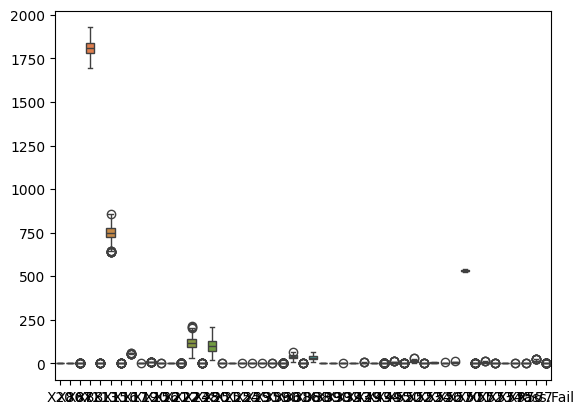

In [37]:
sns.boxplot(df)
plt.show()

군집 분석을 통해 적절한 데이터 셋 분석

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,
                init='k-means++',
                max_iter=300,
                random_state=0).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df['cluster'] = kmeans.labels_
df_result = df.groupby(['Pass.Fail','cluster'])['X20'].count()
print(df_result)

Pass.Fail  cluster
0          0          320
           1          346
1          0           18
           1           24
Name: X20, dtype: int64


상관분석을 통해 상관 관계 분석

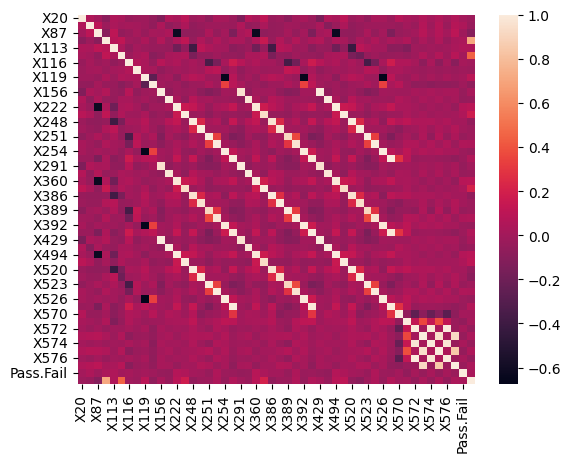

In [40]:
sns.heatmap(df.corr())
plt.show()

In [41]:
y= df.pop('Pass.Fail')

In [42]:
y

3       0
4       0
5       0
10      1
13      0
       ..
1558    0
1559    0
1562    0
1563    0
1564    0
Name: Pass.Fail, Length: 708, dtype: int64

In [43]:
X = df
X

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,cluster
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,1
5,1.3836,2.3745,0.9888,1832.6305,0.9427,748.0887,0.9907,58.6560,0.9632,6.3186,...,7.0970,534.2091,2.3236,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,1
10,1.4195,2.4532,0.9883,1732.2002,0.9380,636.9547,0.9906,58.5394,0.9799,6.2058,...,6.1550,532.1764,1.8715,9.5699,0.2723,3.3618,0.0862,1.7983,14.5507,0
13,1.4191,2.3588,0.9890,1706.2759,0.9378,756.9414,0.9908,59.5615,0.9607,6.3399,...,6.2772,533.2464,2.2354,9.9300,0.2785,3.4410,0.0948,1.8622,12.4598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1.4128,2.4396,0.9929,1796.4239,0.9542,789.1009,0.9897,58.0278,0.9707,5.9349,...,4.8160,532.1700,2.1510,9.1600,0.5035,3.1634,0.1463,1.7213,23.4054,1
1559,1.3784,2.3499,0.9884,1806.5995,0.9529,790.3970,0.9898,56.8354,0.9642,6.3838,...,4.9077,528.7918,2.0831,6.8100,0.4774,2.2727,0.1495,1.2878,22.9183,1
1562,1.4072,2.3762,0.9861,1869.4215,0.9520,727.6761,0.9894,58.3514,0.9636,6.4295,...,2.6649,536.3418,2.0153,7.9800,0.2363,2.6401,0.0785,1.4879,11.7256,1
1563,1.3949,2.4880,0.9911,1872.5133,0.9561,755.7527,0.9899,57.1020,0.9707,6.2902,...,6.0192,537.9264,2.1814,5.4800,0.3891,1.9077,0.1213,1.0187,17.8379,1


Data Scaling은 필요 시 수행(MinMax)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[['X88', 'X115', 'X117', 'X223', 'X250', 'X251', 'X360', 'X361', 'X388', 'X389', 'X495', 'X522', 'X570', 'X572', 'X577']] = scaler.fit_transform(X[['X88', 'X115', 'X117', 'X223', 'X250', 'X251', 'X360', 'X361', 'X388', 'X389', 'X495', 'X522', 'X570', 'X572', 'X577']])

In [45]:
X

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,cluster
3,1.4011,2.4004,0.9904,0.250188,0.9564,0.330630,0.9906,0.511511,0.9761,6.4935,...,6.4865,0.346871,2.0253,0.513450,0.1738,2.8971,0.0525,1.7585,0.202361,0
4,1.3888,2.4530,0.9902,0.576269,0.9424,0.731740,0.9908,0.443786,0.9628,6.3551,...,6.3745,0.455683,2.0275,0.454971,0.2224,3.1776,0.0706,1.6597,0.323071,1
5,1.3836,2.3745,0.9888,0.594418,0.9427,0.509402,0.9907,0.509682,0.9632,6.3186,...,7.0970,0.620605,2.3236,0.464327,0.3201,2.2598,0.0899,1.6679,0.464973,1
10,1.4195,2.4532,0.9883,0.165143,0.9380,0.000000,0.9906,0.481246,0.9799,6.2058,...,6.1550,0.467780,1.8715,0.541509,0.2723,3.3618,0.0862,1.7983,0.504180,0
13,1.4191,2.3588,0.9890,0.054334,0.9378,0.549980,0.9908,0.730514,0.9607,6.3399,...,6.2772,0.548226,2.2354,0.583626,0.2785,3.4410,0.0948,1.8622,0.398430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1.4128,2.4396,0.9929,0.439658,0.9542,0.697389,0.9897,0.356477,0.9707,5.9349,...,4.8160,0.467299,2.1510,0.493567,0.5035,3.1634,0.1463,1.7213,0.952018,1
1559,1.3784,2.3499,0.9884,0.483152,0.9529,0.703330,0.9898,0.065677,0.9642,6.3838,...,4.9077,0.213316,2.0831,0.218713,0.4774,2.2727,0.1495,1.2878,0.927383,1
1562,1.4072,2.3762,0.9861,0.751675,0.9520,0.415838,0.9894,0.435397,0.9636,6.4295,...,2.6649,0.780947,2.0153,0.355556,0.2363,2.6401,0.0785,1.4879,0.361297,1
1563,1.3949,2.4880,0.9911,0.764891,0.9561,0.544532,0.9899,0.130695,0.9707,6.2902,...,6.0192,0.900082,2.1814,0.063158,0.3891,1.9077,0.1213,1.0187,0.670435,1


Training과 Testing으로 8:2로 파티셔닝

In [46]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.2,random_state=3)

In [47]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(566, 49) (142, 49)
(566,) (142,)


최소 3개 이상의 모형을 피팅

In [48]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
lr = LogisticRegression()
dtm = DecisionTreeClassifier()
rfc = RandomForestClassifier()

param_knn = {
    'n_neighbors' : [3,5,7,9,11]
}
param_lr = {
    'max_iter' : [100,150,200]
}
param_dtm = {
    'max_depth' : [3,5,7,9,11],
    'min_samples_split' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,7,9,11]
}
param_rfc = {
    'max_depth' : [5,7,9,11],
    'n_estimators' : [100,150,200],
    'min_samples_split' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,7,9,11]
}


grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=2, verbose=2)
grid_lr = GridSearchCV(lr, param_grid=param_lr, cv=2, verbose=2)
grid_dtm = GridSearchCV(dtm, param_grid=param_dtm, cv=2, verbose=2)
grid_rfc = GridSearchCV(rfc, param_grid=param_rfc, cv=2, verbose=2)



grid_knn.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)
grid_dtm.fit(X_train, y_train)
grid_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END .......................................max_iter=100; total tim

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................................max_iter=150; total time=   0.0s
[CV] END .......................................max_iter=200; total time=   0.1s
[CV] END .......................................max_iter=200; total time=   0.0s
Fitting 2 folds for each of 125 candidates, totalling 250 fits
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=9; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 7, 9, 11],
                         'min_samples_split': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [49]:
print(grid_knn.best_params_)
print(grid_lr.best_params_)
print(grid_dtm.best_params_)
print(grid_rfc.best_params_)

{'n_neighbors': 7}
{'max_iter': 100}
{'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 3}
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [50]:
print(grid_knn.best_score_)
print(grid_lr.best_score_)
print(grid_dtm.best_score_)
print(grid_rfc.best_score_)

0.9328621908127208
0.9328621908127208
0.9328621908127208
0.9328621908127208


In [51]:
## 모델 평가
from sklearn.metrics import classification_report

#knn
k_pred = grid_knn.predict(X_test)
knn_report = classification_report(y_test, k_pred)

#lr
l_pred = grid_lr.predict(X_test)
lr_report = classification_report(y_test, l_pred)

# dtm
d_pred = grid_dtm.predict(X_test)
dtm_report = classification_report(y_test, d_pred)

## rfc
r_pred = grid_rfc.predict(X_test)
random_report = classification_report(y_test, r_pred)



print('knn \n',knn_report)
print('lr \n',lr_report)
print('dtm \n',dtm_report)
print('랜덤 포레스트 \n',random_report)

knn 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       138
           1       0.00      0.00      0.00         4

    accuracy                           0.97       142
   macro avg       0.49      0.50      0.49       142
weighted avg       0.94      0.97      0.96       142

lr 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       138
           1       0.00      0.00      0.00         4

    accuracy                           0.97       142
   macro avg       0.49      0.50      0.49       142
weighted avg       0.94      0.97      0.96       142

dtm 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       138
           1       0.25      0.25      0.25         4

    accuracy                           0.96       142
   macro avg       0.61      0.61      0.61       142
weighted avg       0.96      0.96      0.96       142

랜덤

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

분석 결과
의사결정나무 모델의 경우 정밀도와 재현율, 정확도가 높고, f1-score가 비교적 우수하여 가장 우수한 모델이라고 생각합니다.

파라미터는 knn, lr, 의사결정나무, 랜덤 포레스트는 모두 동일한 값이 나왔고, 그 중 의사결정나무의 파라미터는 {'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 3} 이러합니다.